# Project 2021

####          MSc in Data Analytics 2021 
####          National College of Ireland 
####          Dublin, Ireland 
####          Module: Database and Analytics Programming (H9DAP)
####         Lecturer: Athanasios Staikopoulos

# Load Libraries

In [4]:
#Allows to reload custom module modifications
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Import libraries

In [10]:
#Import libraries
import pandas as pd
#Imports custom functions from 'mypackage'
from  mypackage import functions  # Custom  misc functions
from  mypackage import mongo      # Custom functions for MongoDB
from  mypackage import postgresql # Custom functions for PostgreSQL

# Upload DataSet


In [12]:
# Print the Selected DB and Collection status
dbname = 'Dataset01' #Name of the database to store the data
collname = 'mex_mort_raw' #Name of the collection to store the data
mongo.getDBStatistics(dbname)

[04/25/2021-16:01:08]: NOTICE: Database:   Dataset01  
			       Objects:    10,469 
			       Collectons: 1 
			       Size:       3,179.47 (0.6%)


In [55]:
# Print the Selected DB and Collection status
dbname = 'Dataset02' #Name of the database to store the data
collname = 'us_mort_raw' #Name of the collection to store the data
mongo.getDBStatistics(dbname)

[04/25/2021-16:51:25]: NOTICE: Database:   Dataset02  
			       Objects:    6,239 
			       Collectons: 1 
			       Size:       3,431.53 (0.7%)


In [56]:
# Print the Selected DB and Collection status
dbname = 'Dataset03' #Name of the database to store the data
collname = 'world_mort_raw' #Name of the collection to store the data
mongo.getDBStatistics(dbname)

[04/25/2021-16:51:45]: NOTICE: Database:   Dataset03  
			       Objects:    5,931 
			       Collectons: 1 
			       Size:       3,165.87 (0.6%)


#  Create Dataframe

In [13]:
mex_mort = postgresql.getTableToDataframe('mex_mort')

[04/25/2021-16:01:09]: Connecting to PostgeSQL ...
[04/25/2021-16:01:09]: Queryng table mex_mort ...
[04/25/2021-16:01:11]: OK: Sucesfully importred mex_mort into dataframe columns: 29 - rows: 10469
[04/25/2021-16:01:11]: Closing DB connection...


In [14]:
us_mort = postgresql.getTableToDataframe('us_mort')

[04/25/2021-16:01:13]: Connecting to PostgeSQL ...
[04/25/2021-16:01:13]: Queryng table us_mort ...
[04/25/2021-16:01:14]: OK: Sucesfully importred us_mort into dataframe columns: 12 - rows: 5781
[04/25/2021-16:01:14]: Closing DB connection...


In [15]:
world_mort = postgresql.getTableToDataframe('world_mort')

[04/25/2021-16:01:17]: Connecting to PostgeSQL ...
[04/25/2021-16:01:17]: Queryng table world_mort ...
[04/25/2021-16:01:18]: OK: Sucesfully importred world_mort into dataframe columns: 16 - rows: 5514
[04/25/2021-16:01:18]: Closing DB connection...


In [25]:
mex_mort.head()


,_id,month,age_group,education,employement,marital,state_death,type_death,place_death,icd10_block,icd10_desc,icd10_code,icd10_group,icd10_chapter,is_male,is_work_related,is_foreign,is_pregnant,is_accident,is_cancer,is_cvd,is_diabetes,is_digestive,is_mental,is_pregnancy,is_respiratory,is_virus,is_suicide,is_bacteria
0,1,Jan,55 - 64 years,Elementary,farmer,partnership,QUE,natural,public hospital,9,cerebrovascular diseases,I61,I60-I69,I00–I99,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,2,Jan,75 - 84 years,None,farmer,married,GUA,natural,private hospital,9,cerebrovascular diseases,I64,I60-I69,I00–I99,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,3,Feb,55 - 64 years,Elementary,farmer,single,VER,natural,public hospital,9,cerebrovascular diseases,I61,I60-I69,I00–I99,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,4,May,65 - 74 years,Elementary,unemployed,married,MEX,natural,public hospital,9,cerebrovascular diseases,I67,I60-I69,I00–I99,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,5,Feb,75 - 84 years,Unknown,unemployed,married,CAM,natural,home,9,cerebrovascular diseases,I64,I60-I69,I00–I99,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [17]:
us_mort.head()

,index,icd10_code,marital,month,place_death,day_of_death,resident_status,age_group,race,type_death,icd10_chapter,icd10_block
0,114,A419,single,Nov,public hospital,saturday,intrastate_nonresidents,65-74 years,Black,None,A00–B99,1
1,274,A199,widowed,Apr,public hospital,saturday,US_residents,65-74 years,White,None,A00–B99,1
2,290,A419,divorced,Jan,public hospital,wednesday,US_residents,85 years and over,White,natural,A00–B99,1
3,323,A099,married,Nov,home,sunday,US_residents,55-64 years,White,natural,A00–B99,1
4,325,A481,divorced,Feb,public hospital,sunday,US_residents,45-54 years,White,natural,A00–B99,1


In [18]:
world_mort.head()

,index,country_code,Year,icd10_code,autopsy,split,split_sex,forecast,month,marital,sex,day_of_death,race,age_group,icd10_chapter,icd10_block
0,277,AUT,2019,A419,N,0,0,1,May,married,male,friday,White,55-64 years,A00–B99,1
1,300,AUT,2019,A419,N,0,0,1,Aug,widowed,female,friday,White,85 years and over,A00–B99,1
2,313,AUT,2019,A419,N,0,0,1,May,married,male,friday,White,75-84 years,A00–B99,1
3,403,BEL,2019,A410,N,0,0,1,Oct,married,male,friday,White,45-54 years,A00–B99,1
4,501,BGR,2019,A403,N,0,0,1,Jul,married,male,monday,Korean,85 years and over,A00–B99,1


In [38]:

count_mex = mex_mort.icd10_chapter.value_counts()

In [39]:
count_us=us_mort.icd10_chapter.value_counts()

In [40]:
count_world=world_mort.icd10_chapter.value_counts()

In [43]:
count_df= pd.concat([count_mex,count_us,count_world],axis=1)

In [50]:
count_df

,icd10_chapter,icd10_chapter,icd10_chapter
I00–I99,2798,1897.0,1854
E00–E90,1689,73.0,50
C00–D48,1316,29.0,33
V01–Y98,1151,96.0,89
J00–J99,980,568.0,583
K00–K93,929,273.0,252
N00–N99,376,163.0,158
A00–B99,294,88.0,112
P00–P96,183,16.0,11
G00–G99,179,255.0,210


In [53]:
count_df.columns = ['mex','us','world']

In [54]:
#Total Count of death 
count_df

,mex,us,world
I00–I99,2798,1897.0,1854
E00–E90,1689,73.0,50
C00–D48,1316,29.0,33
V01–Y98,1151,96.0,89
J00–J99,980,568.0,583
K00–K93,929,273.0,252
N00–N99,376,163.0,158
A00–B99,294,88.0,112
P00–P96,183,16.0,11
G00–G99,179,255.0,210


In [57]:
# Import Plotting libraries
import matplotlib.pyplot  as plt
import matplotlib.style as style 
import seaborn as sns

# Visulaization

## HeatMap

<AxesSubplot:>

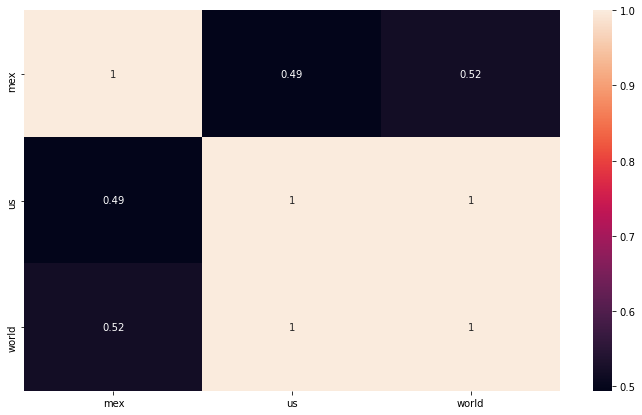

In [59]:
fig, ax = plt.subplots(figsize = (12, 7))
  
count_df = pd.DataFrame(count_df, columns =['mex', 'us', 'world'])
  
corr = count_df.corr()
sns.heatmap(corr, annot = True)

<AxesSubplot:>

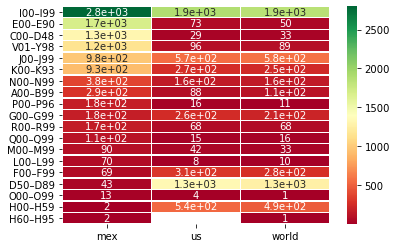

In [60]:
sns.heatmap(count_df, cmap ='RdYlGn', linewidths = 0.30, annot = True)

In [61]:
corr = count_df.corr()
  
# Displaying dataframe as an heatmap 
# with diverging colourmap as coolwarm
corr.style.background_gradient(cmap ='coolwarm')

,mex,us,world
mex,1.000000,0.493956,0.518579
us,0.493956,1.000000,0.999262
world,0.518579,0.999262,1.000000


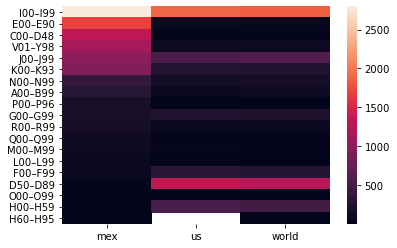

In [63]:
sns.heatmap(count_df)
plt.show()

In [13]:
#sns.set_theme('bmh')
#plt.style.use('plot-style-name-goes-here')
sns.set()
sns.set_context('poster',rc={"grid.linewidth": 5})
sns.set_style("whitegrid")
#sns.set_context("notebook")
colors = ["#5998B1","#406F82","#264653","#287271","#2a9d8f","#8AB17D","#E9C46A","#EFB366","#F4A261","#E76F51","#C53D1B","#923B26"]
#colors = ["#345E6F","#264653","#287271","#2a9d8f","#e9c46a","#efb366","#f4a261","#ee8959","#e76f51","#e87153","#e97c61", '#902C14']
f_folors = ["#E76F51","#F4A261","#E9C46A","#2A9D8F","#264653"]

bin_colors = ["#264653","#2A9D8F"]
sns.set_palette(sns.color_palette(colors))
mul_palette = sns.color_palette(colors)
bin_palette = sns.color_palette(bin_colors)
f_palette = sns.color_palette(f_folors)
sns.set(rc={'figure.figsize':(10,5)}, font_scale=1.5)
sns.set_style({'axes.facecolor':'white', 'grid.color': '.8','grid.linestyle': '--'})

In [23]:
world_mort[world_mort.CountryCode == 'US']

,CountryCode,Year,icd10,Age_Recode,Autopsy,D0_14,D15_64,D65_74,D75_84,D85p,DTotal,R0_14,R15_64,R65_74,R75_84,R85p,RTotal,Split,SplitSex,Forecast,month,marital,type_death,sex,day_of_death,race,icd10_chapter,icd10_block
